In [1]:
from data_tools.preprocess import *
from helper_code import load_signals
from data_tools.data_set import ECGDataset

%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

In [2]:
def plot_preprocess(orig_signal, filtered_signal, orig_fs, resample_fs):
    L1 = orig_signal.shape[0]
    L2 = filtered_signal.shape[0]

    # Create time axes
    t1 = np.linspace(0, L1 / orig_fs, L1, endpoint=False)
    t2 = np.linspace(0, L2 / resample_fs, L2, endpoint=False)

    # Plot
    fig, axes = plt.subplots(12, 1, figsize=(10, 3 * 12), sharex=True)
    for ch in range(12):
        axes[ch].plot(t1, orig_signal[:, ch], label="Original Signal", alpha=0.7)
        axes[ch].plot(t2, filtered_signal[:, ch], label="Filtered Signal", alpha=0.9)
        axes[ch].set_ylabel(f"Channel {ch+1}")
        axes[ch].legend()

    axes[-1].set_xlabel("Time (s)")
    plt.suptitle("Comparison of Original and Filtered Signals")
    plt.tight_layout()
    plt.show()

In [3]:

preprocess_config = PreprocessConfig(resample_freq=128, low_cut_freq=0.5, high_cut_freq=45)
data_set = ECGDataset('C:/cecgnet/data/code15/output/small', 934, preprocess_config)

In [4]:

def filter_and_plot_by_index(idx: int):
    a_file_name = data_set.record_files[idx]
    signal, fields = load_signals(a_file_name)
    filtered_signal = preprocess(signal, fields['sig_name'], fields['fs'], 934, preprocess_config)
    plot_preprocess(signal, filtered_signal, fields['fs'], 128)


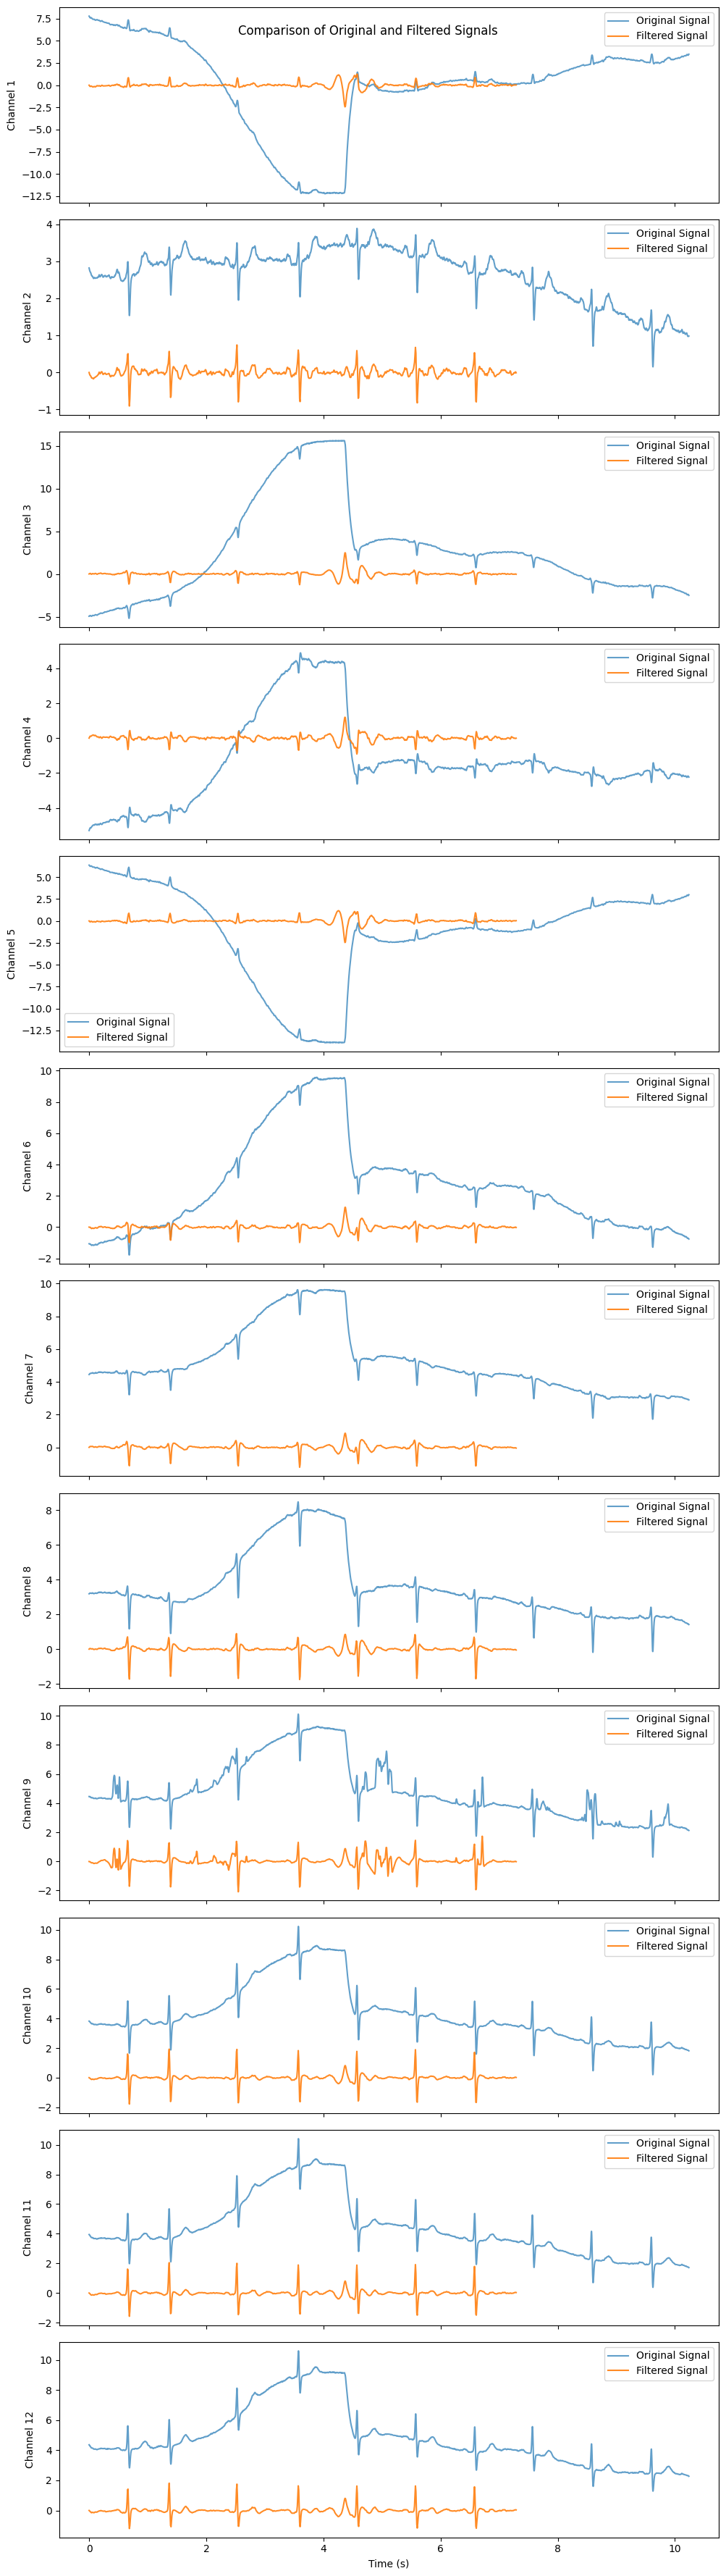

In [5]:
filter_and_plot_by_index(0)

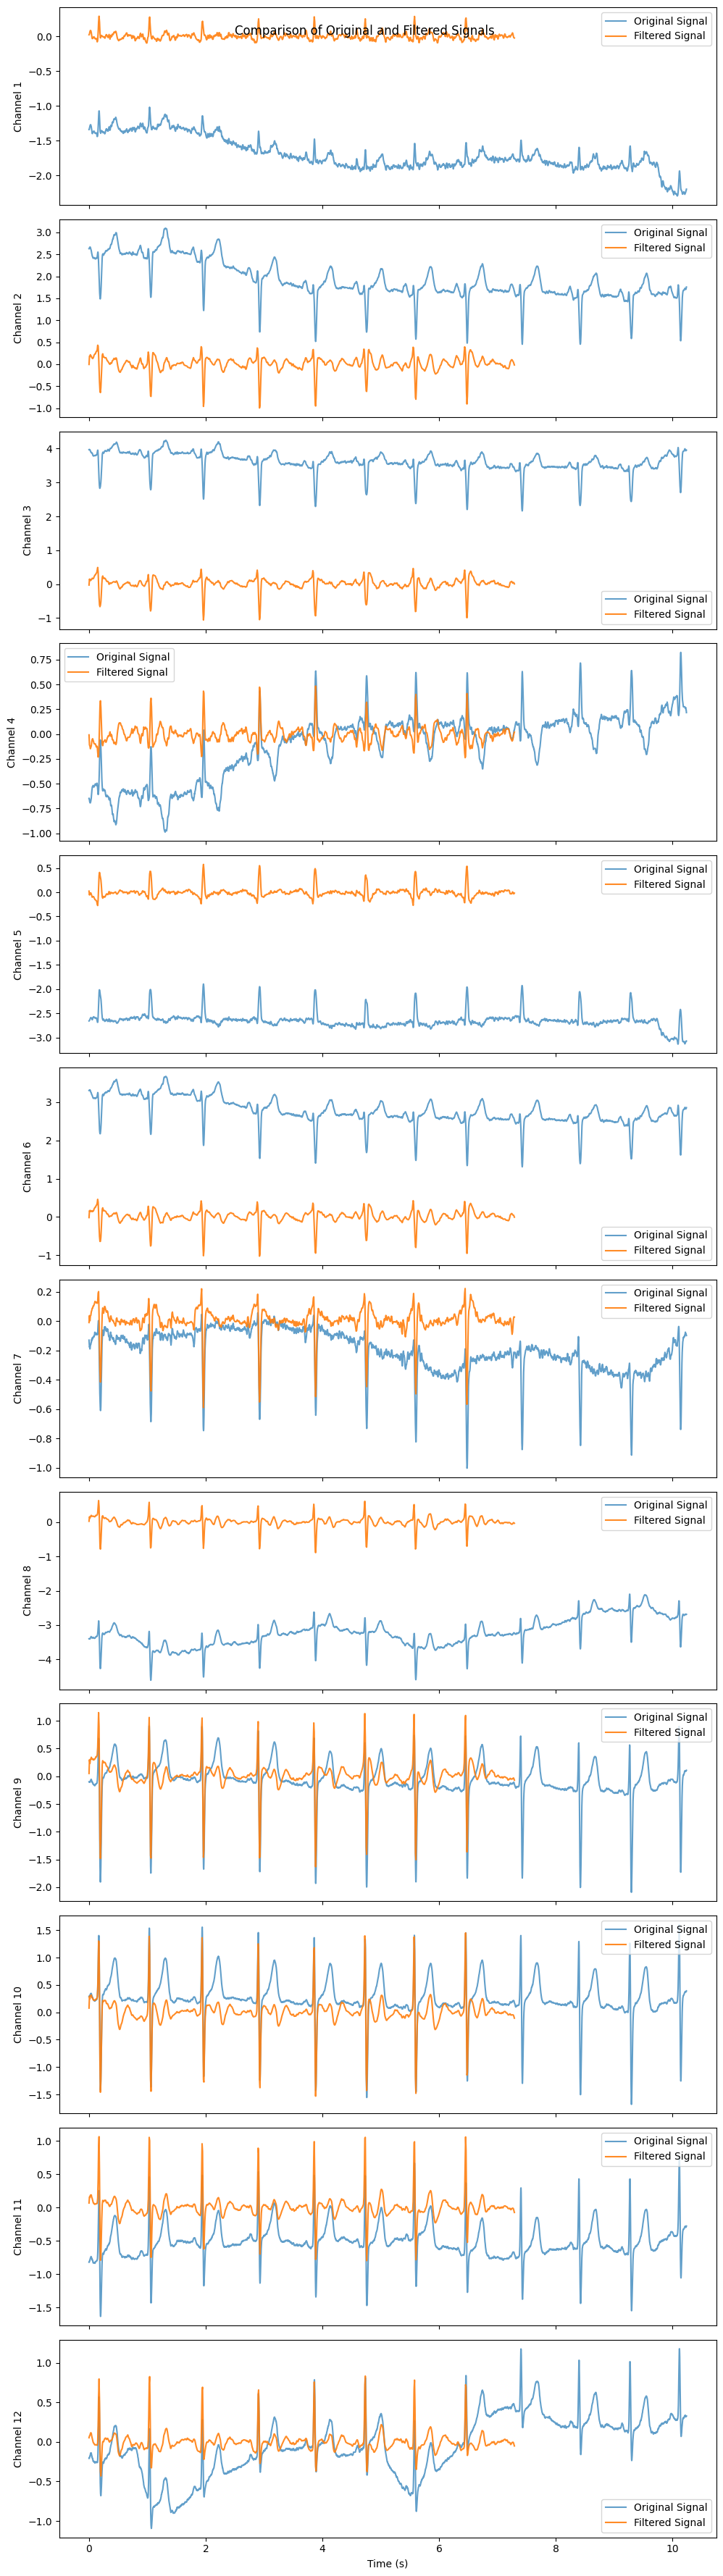

In [6]:
filter_and_plot_by_index(1)

In [7]:
a_file_name = data_set.record_files[0]
signal, fields = load_signals(a_file_name)

In [8]:
%timeit trim_leading_zeros(signal)

107 μs ± 13.2 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [9]:
%timeit preprocess(signal, fields['sig_name'], fields['fs'], 934, preprocess_config)

14.5 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


# wavelet filtering is good

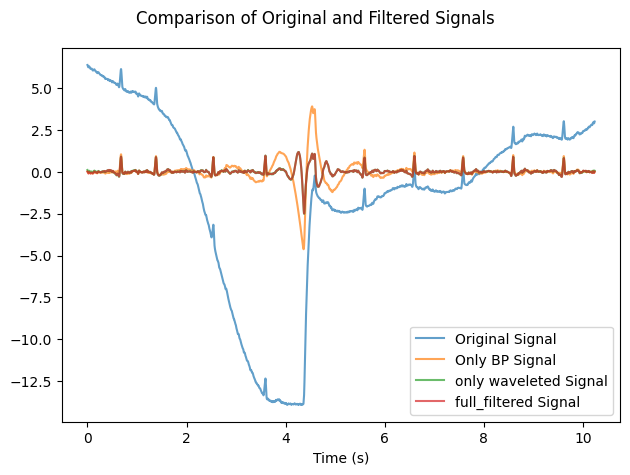

In [10]:
filters = create_filters(1, 45, 10)
a_file_name = data_set.record_files[0]
signal, fields = load_signals(a_file_name)
filtered_signal = filter_signal(signal, filters[400])
waveleted = np.apply_along_axis(remove_baseline_wander, 0, signal)
full_filtered = filter_signal(waveleted, filters[400])

L = filtered_signal.shape[0]
t = np.linspace(0, L / 400, L, endpoint=False)

plt.plot(t, signal[:, 4], label="Original Signal", alpha=0.7)
plt.plot(t, filtered_signal[:, 4], label="Only BP Signal", alpha=0.7)
plt.plot(t, waveleted[:, 4], label="only waveleted Signal", alpha=0.7)
plt.plot(t, full_filtered[:, 4], label="full_filtered Signal", alpha=0.7)
plt.legend()

plt.xlabel("Time (s)")
plt.suptitle("Comparison of Original and Filtered Signals")
plt.tight_layout()
plt.show()